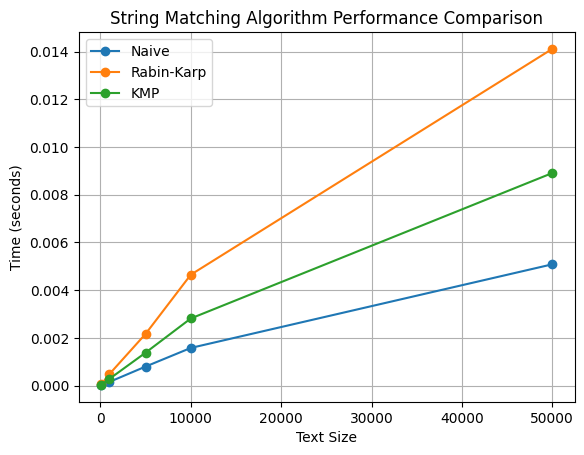

Dynamic Programming: Max Value = 7, Time = 0.000019 seconds


In [18]:
import time
import random
import string
import matplotlib.pyplot as plt

def naive_search(text, pattern):
    n = len(text)
    m = len(pattern)
    for i in range(n - m + 1):
        if text[i:i + m] == pattern:
            return True
    return False

def rabin_karp(text, pattern):
    n = len(text)
    m = len(pattern)
    d = 256
    q = 101
    p = 0
    t = 0
    h = 1
    for i in range(m - 1):
        h = (h * d) % q
    for i in range(m):
        p = (d * p + ord(pattern[i])) % q
        t = (d * t + ord(text[i])) % q
    for i in range(n - m + 1):
        if p == t:
            if text[i:i + m] == pattern:
                return True
        if i < n - m:
            t = (d * (t - ord(text[i]) * h) + ord(text[i + m])) % q
            if t < 0:
                t += q
    return False

def kmp_search(text, pattern):
    n = len(text)
    m = len(pattern)
    lps = [0] * m
    compute_lps(pattern, m, lps)
    i = 0
    j = 0
    while i < n:
        if pattern[j] == text[i]:
            i += 1
            j += 1
        if j == m:
            return True
        elif i < n and pattern[j] != text[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return False

def compute_lps(pattern, m, lps):
    length = 0
    lps[0] = 0
    i = 1
    while i < m:
        if pattern[i] == pattern[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1

def generate_random_string(length):
    return ''.join(random.choices(string.ascii_lowercase, k=length))

text_sizes = [100, 1000, 5000, 10000, 50000]
naive_times = []
rabin_karp_times = []
kmp_times = []

pattern = "abc"

for size in text_sizes:
    text = generate_random_string(size)

    start_time = time.time()
    naive_search(text, pattern)
    naive_times.append(time.time() - start_time)

    start_time = time.time()
    rabin_karp(text, pattern)
    rabin_karp_times.append(time.time() - start_time)

    start_time = time.time()
    kmp_search(text, pattern)
    kmp_times.append(time.time() - start_time)

plt.plot(text_sizes, naive_times, label='Naive', marker='o')
plt.plot(text_sizes, rabin_karp_times, label='Rabin-Karp', marker='o')
plt.plot(text_sizes, kmp_times, label='KMP', marker='o')
plt.xlabel('Text Size')
plt.ylabel('Time (seconds)')
plt.title('String Matching Algorithm Performance Comparison')
plt.legend()
plt.grid()
plt.show()


import time

def knapsack_dynamic_programming(weights, values, capacity):
    n = len(weights)
    # Create a 2D array to store maximum values
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    # Fill the DP table
    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i-1] <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w - weights[i-1]] + values[i-1])
            else:
                dp[i][w] = dp[i-1][w]

    return dp[n][capacity]

# Function to compare the performance of the Dynamic Programming approach
def compare_knapsack(weights, values, capacity):
    start_time = time.time()
    result_dp = knapsack_dynamic_programming(weights, values, capacity)
    time_dp = time.time() - start_time

    # Print Results
    print(f"Dynamic Programming: Max Value = {result_dp}, Time = {time_dp:.6f} seconds")

# Example usage
if __name__ == "__main__":
    weights = [2, 3, 4, 5]
    values = [3, 4, 5, 6]
    capacity = 5

    compare_knapsack(weights, values, capacity)